# Disease Prediction


**Goal:** The purpose of this notebook is to use the Behavioral Risk Factor Surveillance to predict a few diseases and compare algorithms

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics
import io
import time
sns.set(style='ticks')
sns.set_style("darkgrid")

In [2]:
#Open files
#url=""
#df = pd.read_csv(url)
#====using GDrive============
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/2015.csv")

## Cleaning up Data for Exploration

In [4]:
#Check top 5 rows and increase the number of columns
pd.set_option("display.max_columns", 400)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,88.0,3.0,2.0,280.0,510.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,b'',b'',3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0,4.0,2.0,1.0,2.0

In [5]:
#Check the rows and the columns
df.shape

(441456, 330)

In [6]:
# choose interested features
columns = ["GENHLTH",
"TOLDHI2",
"ADDEPEV2",
"DIABETE3",
"DIABAGE2",
"SEX",
"FRUITJU1",
"FRUIT1",
"FVBEANS",
"FVGREEN",
"FVORANG",
"VEGETAB1",
"EXRACT11",
"PREDIAB1",
"_CHOLCHK",
"_RFCHOL",
"_RACE",
"MARITAL",
"_AGE_G",
"_RFBMI5",
"EDUCA",
"INCOME2",
"PHYSHLTH",
"MEDCOST",
"_RFSMOK3",
"_RFDRHV5",
"FTJUDA1_",
"FRUTDA1_",
"BEANDAY_",
"GRENDAY_",
"ORNGDAY_",
"_FRTLT1",
"_VEGLT1",
"_PACAT1",
"_TOTINDA"
]

In [7]:
#create new dataframe with selelcted features
df_selected=  df[columns]

In [8]:
#check new dataframe
df_selected.head()

,GENHLTH,TOLDHI2,ADDEPEV2,DIABETE3,DIABAGE2,SEX,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXRACT11,PREDIAB1,_CHOLCHK,_RFCHOL,_RACE,MARITAL,_AGE_G,_RFBMI5,EDUCA,INCOME2,PHYSHLTH,MEDCOST,_RFSMOK3,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,_FRTLT1,_VEGLT1,_PACAT1,_TOTINDA
0,5.0,1.0,1.0,3.0,NaN,2.0,305.0,310.0,320.0,310.0,305.0,101.0,NaN,3.0,1.0,2.0,1.0,1.0,5.0,2.0,4.0,3.0,15.0,2.0,1.0,1.0,1.700000e+01,33.0,6.700000e+01,33.0,17.0,2.0,1.0,4.0,2.0
1,3.0,2.0,2.0,3.0,NaN,2.0,302.0,305.0,302.0,202.0,202.0,304.0,64.0,3.0,2.0,1.0,1.0,2.0,4.0,2.0,6.0,1.0,88.0,1.0,2.0,1.0,7.000000e+00,17.0,7.000000e+00,29.0,29.0,2.0,2.0,2.0,1.0
2,4.0,1.0,2.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0,1.0,2.0,6.0,1.0,4.0,99.0,15.0,2.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0
3,5.0,1.0,1.0,3.0,NaN,2.0,555.0,101.0,555.0,301.0,301.0,201.0,NaN,3.0,1.0,2.0,1.0,1.0,5.0,2.0,4.0,8.0,30.0,1.0,1.0,1.0,5.397605e-79,100.0,5.397605e-79,3.0,3.0,1.0,2.0,4.0,2.0
4,5.0,2.0,2.0,3.0,NaN,2.0,777.0,102.0,203.0,204.0,310.0,320.0,NaN,3.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,77.0,20.0,2.0,1.0,1.0,NaN,200.0,4.300000e+01,57.0,33.0,9.0,1.0,4.0,2.0


In [9]:
#double check shape
df_selected.shape

(441456, 35)

In [10]:
#check missing value and it's quite a bit of missing values. 
#calling is sum twice with sum both columns and rows. We difinitely can't drop missing values
df_selected.isnull().sum().sum()

1386555

In [11]:
#check which columns has the most missing values
df_selected.isnull().sum()

GENHLTH          2
TOLDHI2      59154
ADDEPEV2         0
DIABETE3         7
DIABAGE2    384203
SEX              0
FRUITJU1     27998
FRUIT1       29150
FVBEANS      30375
FVGREEN      31311
FVORANG      32115
VEGETAB1     33138
EXRACT11    145678
PREDIAB1    358696
_CHOLCHK         0
_RFCHOL      59154
_RACE            0
MARITAL          0
_AGE_G           0
_RFBMI5          0
EDUCA            0
INCOME2       3301
PHYSHLTH         1
MEDCOST          1
_RFSMOK3         0
_RFDRHV5         0
FTJUDA1_     38535
FRUTDA1_     36582
BEANDAY_     39947
GRENDAY_     37949
ORNGDAY_     39258
_FRTLT1          0
_VEGLT1          0
_PACAT1          0
_TOTINDA         0
dtype: int64

In [12]:
#now we have to take out some columns eg. the ones for fruits
cols_to_drop = ["FTJUDA1_", 
                "FRUTDA1_", 
                "BEANDAY_", 
                "GRENDAY_", 
                "ORNGDAY_",
                "FRUITJU1",
                "FRUIT1",
                "FVBEANS",
                "FVGREEN",
                "FVORANG",
                "VEGETAB1",
                "EXRACT11",
                "PREDIAB1",
                "DIABAGE2",
                "_RFCHOL",
                "_CHOLCHK",
                "TOLDHI2"]
df_revised2 = df_selected.drop(cols_to_drop, axis=1)
df_revised2.isnull().sum()


GENHLTH        2
ADDEPEV2       0
DIABETE3       7
SEX            0
_RACE          0
MARITAL        0
_AGE_G         0
_RFBMI5        0
EDUCA          0
INCOME2     3301
PHYSHLTH       1
MEDCOST        1
_RFSMOK3       0
_RFDRHV5       0
_FRTLT1        0
_VEGLT1        0
_PACAT1        0
_TOTINDA       0
dtype: int64

In [13]:
#lets drop missing values now and see
df_revised2 = df_revised2.dropna()
df_revised2.shape

(438145, 18)

In [14]:
#view data again
df_revised2.head()

,GENHLTH,ADDEPEV2,DIABETE3,SEX,_RACE,MARITAL,_AGE_G,_RFBMI5,EDUCA,INCOME2,PHYSHLTH,MEDCOST,_RFSMOK3,_RFDRHV5,_FRTLT1,_VEGLT1,_PACAT1,_TOTINDA
0,5.0,1.0,3.0,2.0,1.0,1.0,5.0,2.0,4.0,3.0,15.0,2.0,1.0,1.0,2.0,1.0,4.0,2.0
1,3.0,2.0,3.0,2.0,1.0,2.0,4.0,2.0,6.0,1.0,88.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0
2,4.0,2.0,3.0,2.0,1.0,2.0,6.0,1.0,4.0,99.0,15.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0
3,5.0,1.0,3.0,2.0,1.0,1.0,5.0,2.0,4.0,8.0,30.0,1.0,1.0,1.0,1.0,2.0,4.0,2.0
4,5.0,2.0,3.0,2.0,1.0,1.0,5.0,1.0,5.0,77.0,20.0,2.0,1.0,1.0,9.0,1.0,4.0,2.0


In [15]:
#We want to have or dependent variable (y) to be categorized as follows:
# 0 for no diabetes diabetes | 1 diabetes. Based on the support document,
#we also have 7 and 9 for don't know and refused. These can be deleted.
df_revised2['DIABETE3'] = df_revised2['DIABETE3'].replace({3:0,4:0})
df_revised2 = df_revised2[df_revised2.DIABETE3 != 7]
df_revised2 = df_revised2[df_revised2.DIABETE3 != 9]
df_revised2 = df_revised2[df_revised2.DIABETE3 != 2] # taken diabetes during pregnancy. This will not affect the balance male vs female since we already have more female participants
#check the set of values in column
df_revised2['DIABETE3'].unique()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([0., 1.])

In [16]:
#check a sample
df_revised2.sample(10)

,GENHLTH,ADDEPEV2,DIABETE3,SEX,_RACE,MARITAL,_AGE_G,_RFBMI5,EDUCA,INCOME2,PHYSHLTH,MEDCOST,_RFSMOK3,_RFDRHV5,_FRTLT1,_VEGLT1,_PACAT1,_TOTINDA
205519,1.0,2.0,0.0,2.0,1.0,1.0,3.0,2.0,5.0,5.0,88.0,2.0,1.0,1.0,9.0,9.0,9.0,9.0
437227,3.0,2.0,0.0,1.0,8.0,5.0,2.0,2.0,5.0,4.0,20.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
347111,3.0,2.0,0.0,2.0,1.0,1.0,4.0,2.0,4.0,8.0,88.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0
343806,4.0,2.0,0.0,1.0,1.0,2.0,6.0,1.0,2.0,2.0,88.0,2.0,2.0,1.0,2.0,2.0,3.0,1.0
144045,1.0,2.0,0.0,1.0,1.0,2.0,5.0,2.0,4.0,2.0,30.0,2.0,2.0,1.0,2.0,2.0,4.0,2.0
191807,3.0,2.0,0.0,1.0,1.0,5.0,2.0,2.0,5.0,7.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
318741,4.0,2.0,0.0,2.0,1.0,1.0,5.0,1.0,4.0,6.0,15.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0
225203,3.0,2.0,0.0,1.0,1.0,1.0,6.0,2.0,4.0,99.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
139549,3.0,2.0,0.0,2.0,1.0,1.0,5.0,1.0,6.0,99.0,88.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
262723,3.0,2.0,0.0,1.0,2.0,1.0,6.0,1.0,6.0,99.0,88.0,2.0,1.0,1.0,2.0,2.0,4.0,2.0


In [17]:
#Perusing the support document and the code above I need to categorize many values and removing some. I will now write a general function to achieve this.
#parameters needed: Column (String), Dictionary of value and what to replace and also the values to remove.
def Categorize_and_Remove(thedf, cname, cdict={},ntorem=[]):
  mydf = None
  mydf = thedf
  if cdict:
    mydf[cname] = mydf[cname].replace(cdict)
  if ntorem:
    for i in ntorem:
      mydf = mydf[mydf[cname] != i]
  return mydf
#test to change 3 to 0 and 2 to 0 for not checked cholesterol in past 5 years
#test = Categorize_and_Remove(df_revised2, '_CHOLCHK',{3:0,2:0}, [9])
#test['_CHOLCHK'].unique()

#Using the function to categorizing and moving the others
#change 2 to 0 fro physical activity and remove 9
test2 = Categorize_and_Remove(df_revised2, '_TOTINDA',{2:0},[9])
test2['_TOTINDA'].unique()

array([0., 1.])

In [18]:
#check dataframe again and it is working
test2.sample(10)

,GENHLTH,ADDEPEV2,DIABETE3,SEX,_RACE,MARITAL,_AGE_G,_RFBMI5,EDUCA,INCOME2,PHYSHLTH,MEDCOST,_RFSMOK3,_RFDRHV5,_FRTLT1,_VEGLT1,_PACAT1,_TOTINDA
267081,4.0,2.0,0.0,1.0,1.0,1.0,4.0,2.0,4.0,5.0,88.0,1.0,1.0,1.0,1.0,2.0,4.0,0.0
333877,1.0,2.0,0.0,2.0,8.0,2.0,4.0,1.0,6.0,77.0,2.0,1.0,1.0,1.0,1.0,1.0,9.0,1.0
199731,3.0,1.0,0.0,2.0,1.0,1.0,6.0,2.0,4.0,6.0,88.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
144965,2.0,2.0,0.0,2.0,1.0,2.0,3.0,2.0,4.0,6.0,88.0,2.0,1.0,1.0,2.0,1.0,4.0,1.0
417754,3.0,2.0,0.0,2.0,1.0,3.0,6.0,1.0,5.0,6.0,3.0,2.0,1.0,1.0,2.0,2.0,4.0,0.0
49956,1.0,2.0,0.0,2.0,4.0,1.0,5.0,1.0,6.0,5.0,88.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0
166854,2.0,2.0,0.0,1.0,1.0,1.0,4.0,2.0,5.0,99.0,88.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0
272056,3.0,2.0,0.0,2.0,8.0,4.0,3.0,1.0,4.0,1.0,88.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
379284,1.0,2.0,0.0,2.0,1.0,3.0,4.0,1.0,5.0,99.0,88.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
84405,1.0,2.0,0.0,2.0,2.0,5.0,1.0,1.0,5.0,8.0,88.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0


In [19]:
#Using the function to categorizing and moving the others
#change 2 to 0  remove 9
test3 = Categorize_and_Remove(test2, '_FRTLT1',{2:0},[9])
test3['_FRTLT1'].unique()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([0., 1.])

In [20]:
#Using the function to categorizing and moving the others
#change 2 to 0  
test4 = Categorize_and_Remove(test3, 'SEX',{2:0})
test4['SEX'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([0., 1.])

In [21]:
#Using the function to categorizing and moving the others
#change 2 to 0  remove 7 and 9 (don't now and refused)
test5 = Categorize_and_Remove(test4, 'MEDCOST',{2:0},[7,9])
test5['MEDCOST'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([0., 1.])

In [22]:
#Using the function to categorizing and moving the others
#remove 7 and 9 (don't now and refused)
test6 = Categorize_and_Remove(test5, 'GENHLTH',{},[7,9])
test6['GENHLTH'].unique()

array([5., 3., 2., 4., 1.])

In [23]:
#Using the function to categorizing and moving the others
#change 2 to 0  remove 9
test7 = Categorize_and_Remove(test6, '_VEGLT1',{2:0},[9])
test7['_VEGLT1'].unique()

array([1., 0.])

In [24]:
#Using the function to categorizing and moving the others
#change 88 to 0  remove 77 and 99
test8 = Categorize_and_Remove(test7, 'PHYSHLTH',{88:0},[77,99])
test8['PHYSHLTH'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([15.,  0., 30.,  8.,  2., 14.,  6., 28.,  1.,  7., 10., 20.,  3.,
        5., 17.,  4., 19., 21., 25., 12., 27., 22., 29., 24.,  9., 16.,
       18., 23., 13., 26., 11.])

In [25]:
#Using the function to categorizing and moving the others
#remove 9 (don't refused)
test9 = Categorize_and_Remove(test8, 'EDUCA',{},[9])
test9['EDUCA'].unique()

array([4., 6., 3., 5., 2., 1.])

In [26]:
#Using the function to categorizing and moving the others
#remove 77 and 99 (don't now and refused)
test10 = Categorize_and_Remove(test9, 'INCOME2',{},[77,99])
test10['INCOME2'].unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [27]:
#Using the function to categorizing and moving the others
#change 2 to 0 remove 7 and 9 (don't now and refused)
test11 = Categorize_and_Remove(test10, 'ADDEPEV2',{2:0},[7,9])
test11['ADDEPEV2'].unique()

array([1., 0.])

In [28]:
#Using the function to categorizing and moving the others
#remove 9 (don't refused)
test12 = Categorize_and_Remove(test11, '_RACE',{},[9])
test12['_RACE'].unique()

array([1., 7., 2., 3., 6., 4., 8., 5.])

In [29]:
#Using the function to categorizing and moving the others
#remove 9 (don't refused)
test13 = Categorize_and_Remove(test12, 'MARITAL',{},[9])
test13['MARITAL'].unique()

array([1., 2., 3., 6., 5., 4.])

In [30]:
#Using the function to categorizing and moving the others
#remove 9 (don't refused)
test14 = Categorize_and_Remove(test13, '_RFBMI5',{},[9])
test14['_RFBMI5'].unique()

array([2., 1.])

In [31]:
#Using the function to categorizing and moving the others
#remove 9 (don't refused)
test15 = Categorize_and_Remove(test14, '_RFSMOK3',{},[9])
test15['_RFSMOK3'].unique()

array([1., 2.])

In [32]:
#Using the function to categorizing and moving the others
#remove 9 (don't refused)
test16 = Categorize_and_Remove(test15, '_RFDRHV5',{},[9])
test16['_RFDRHV5'].unique()

array([1., 2.])

In [33]:
#Using the function to categorizing and moving the others
#remove 9 (don't refused)
test17 = Categorize_and_Remove(test16, '_PACAT1',{},[9])
test17['_PACAT1'].unique()

array([4., 2., 1., 3.])

In [34]:
#check size not bad
test17.shape

(284980, 18)

In [35]:
#let's check a sample again
test17.sample(10)

,GENHLTH,ADDEPEV2,DIABETE3,SEX,_RACE,MARITAL,_AGE_G,_RFBMI5,EDUCA,INCOME2,PHYSHLTH,MEDCOST,_RFSMOK3,_RFDRHV5,_FRTLT1,_VEGLT1,_PACAT1,_TOTINDA
366725,2.0,1.0,0.0,0.0,1.0,1.0,6.0,2.0,4.0,6.0,25.0,0.0,1.0,1.0,1.0,1.0,4.0,0.0
117443,1.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0,6.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
247594,2.0,0.0,0.0,0.0,1.0,1.0,6.0,2.0,5.0,7.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
56958,2.0,0.0,1.0,1.0,1.0,1.0,6.0,2.0,5.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0
292011,3.0,0.0,0.0,1.0,8.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,4.0,0.0
113280,2.0,0.0,0.0,1.0,1.0,1.0,5.0,2.0,4.0,7.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
197780,3.0,1.0,1.0,0.0,1.0,3.0,6.0,2.0,6.0,8.0,2.0,0.0,2.0,1.0,1.0,1.0,2.0,1.0
39156,2.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,8.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0
271844,3.0,0.0,0.0,0.0,1.0,6.0,1.0,2.0,5.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0
370949,1.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,5.0,8.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [36]:
#important check is the size of each label for diabtes
test17.groupby(['DIABETE3']).size()

DIABETE3
0.0    248537
1.0     36443
dtype: int64

In [37]:
#now the plan is to get the same number records for diabetes, no diabetes 
diab_df = test17[test17.DIABETE3 == 1.0]
no_diab_df = test17[test17.DIABETE3 == 0.0].sample(36443)

In [38]:
diab_df.shape

(36443, 18)

In [39]:
frames = [diab_df, no_diab_df]
result = pd.concat(frames)

In [40]:
#check size again
result.shape

(72886, 18)

In [41]:
#check sample again
result.sample(5)

,GENHLTH,ADDEPEV2,DIABETE3,SEX,_RACE,MARITAL,_AGE_G,_RFBMI5,EDUCA,INCOME2,PHYSHLTH,MEDCOST,_RFSMOK3,_RFDRHV5,_FRTLT1,_VEGLT1,_PACAT1,_TOTINDA
281499,4.0,0.0,1.0,1.0,1.0,2.0,5.0,2.0,4.0,5.0,5.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0
126766,3.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,5.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0
218218,3.0,0.0,0.0,0.0,8.0,6.0,2.0,2.0,6.0,4.0,2.0,0.0,2.0,1.0,0.0,1.0,2.0,1.0
297440,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,5.0,6.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0
206986,3.0,1.0,0.0,0.0,1.0,6.0,4.0,2.0,5.0,5.0,3.0,0.0,2.0,1.0,1.0,1.0,3.0,1.0


## Exploratory Data Analysis

[Text(0, 0, '18-24'),
 Text(0, 0, '25-34'),
 Text(0, 0, '35-44'),
 Text(0, 0, '45-54'),
 Text(0, 0, '55-64'),
 Text(0, 0, '65 or older')]

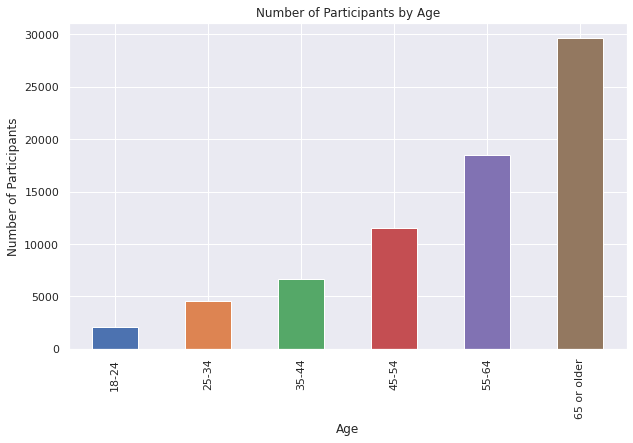

In [42]:
#check frequency of ages
ax = result.groupby(['_AGE_G']).size().plot(kind='bar', figsize=(10,6), title="Number of Participants by Age",color=['C0', 'C1', 'C2','C3','C4','C5'])
ax.set_xlabel("Age")
ax.set_ylabel("Number of Participants")
ax.set_xticklabels(['18-24','25-34','35-44','45-54','55-64','65 or older'])

In [43]:
#Function that can calculate the percentage for the pie chart
#result.groupby(['SEX']).size()
#result.SEX.value_counts()
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

Text(0, 0.5, '')

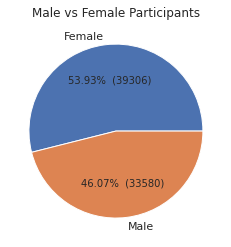

In [44]:
#create pie chart showing male vs females
ax = result.SEX.value_counts().plot.pie(autopct=make_autopct(result.SEX.value_counts()), title='Male vs Female Participants', labels=['Female', 'Male'])
ax.set_ylabel('')


## Feature Selection/Engineering



In [45]:
#Normally I would do some feature engineering here, but the only thing needed here is to make the columns more readable
#[GENHLTH 	ADDEPEV2 	DIABETE3 	SEX 	_RACE 	MARITAL 	_AGE_G 	_RFBMI5 	EDUCA 	INCOME2 	PHYSHLTH 	MEDCOST 	_RFSMOK3 	_RFDRHV5 	_FRTLT1 	_VEGLT1 	_PACAT1 	_TOTINDA]
new_columns = ['General_Health','Depressive_Disorder','Diabetes','Sex', 'Race','Marital','Age','BMI_status','Schooling','Income','Physical_Health','Medical_Cost','Smoker','Drinker','Fruits','Vegetable','Physical_Activity','Exercise']
result = result.set_axis(new_columns, axis=1)
print(result.columns)

Index(['General_Health', 'Depressive_Disorder', 'Diabetes', 'Sex', 'Race',
       'Marital', 'Age', 'BMI_status', 'Schooling', 'Income',
       'Physical_Health', 'Medical_Cost', 'Smoker', 'Drinker', 'Fruits',
       'Vegetable', 'Physical_Activity', 'Exercise'],
      dtype='object')


In [46]:
#print sample again
result.sample(5)

,General_Health,Depressive_Disorder,Diabetes,Sex,Race,Marital,Age,BMI_status,Schooling,Income,Physical_Health,Medical_Cost,Smoker,Drinker,Fruits,Vegetable,Physical_Activity,Exercise
105423,4.0,0.0,1.0,0.0,1.0,1.0,5.0,2.0,4.0,6.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
419926,4.0,1.0,1.0,0.0,1.0,6.0,1.0,2.0,5.0,5.0,0.0,0.0,2.0,1.0,1.0,1.0,4.0,0.0
48973,4.0,1.0,0.0,1.0,1.0,5.0,5.0,2.0,6.0,4.0,30.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0
284604,4.0,1.0,0.0,0.0,4.0,5.0,2.0,2.0,5.0,2.0,10.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
377801,1.0,0.0,0.0,1.0,1.0,2.0,5.0,1.0,6.0,8.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


[Text(0, 0, 'General_Health'),
 Text(0, 0, 'Depressive_Disorder'),
 Text(0, 0, 'Diabetes'),
 Text(0, 0, 'Sex'),
 Text(0, 0, 'Race'),
 Text(0, 0, 'Marital'),
 Text(0, 0, 'Age'),
 Text(0, 0, 'BMI_status'),
 Text(0, 0, 'Schooling'),
 Text(0, 0, 'Income'),
 Text(0, 0, 'Physical_Health'),
 Text(0, 0, 'Medical_Cost'),
 Text(0, 0, 'Smoker'),
 Text(0, 0, 'Drinker'),
 Text(0, 0, 'Fruits'),
 Text(0, 0, 'Vegetable'),
 Text(0, 0, 'Physical_Activity'),
 Text(0, 0, 'Exercise')]

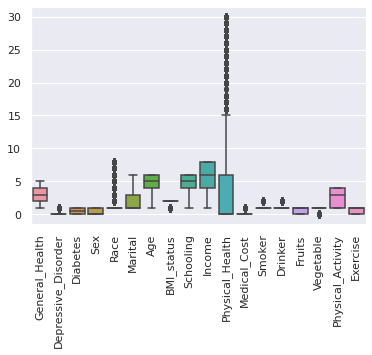

In [47]:
#see boxplots of colums to look for outliers and have a better understading about the distribution of data at a high level.
#Physical Health might look the wierdest, but that because of the values used
ax1 = sns.boxplot(data=result)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

In [48]:
#We will use a correlation matrix. This will tell us whether there is a positive or negative correlation.
#This will also tell the strength of the relationship 
corr = result.corr()
print(corr)

                     General_Health  Depressive_Disorder  Diabetes       Sex  \
General_Health             1.000000             0.262081  0.406355 -0.023425   
Depressive_Disorder        0.262081             1.000000  0.108667 -0.134270   
Diabetes                   0.406355             0.108667  1.000000  0.032755   
Sex                       -0.023425            -0.134270  0.032755  1.000000   
Race                       0.103089            -0.005976  0.039867 -0.015749   
Marital                    0.055519             0.067173 -0.026273 -0.072317   
Age                        0.182158            -0.026529  0.334309 -0.006006   
BMI_status                 0.187639             0.069203  0.259458  0.096091   
Schooling                 -0.283208            -0.067555 -0.155950  0.038749   
Income                    -0.373313            -0.194829 -0.201255  0.150282   
Physical_Health            0.549432             0.257479  0.221578 -0.052727   
Medical_Cost               0.166284     

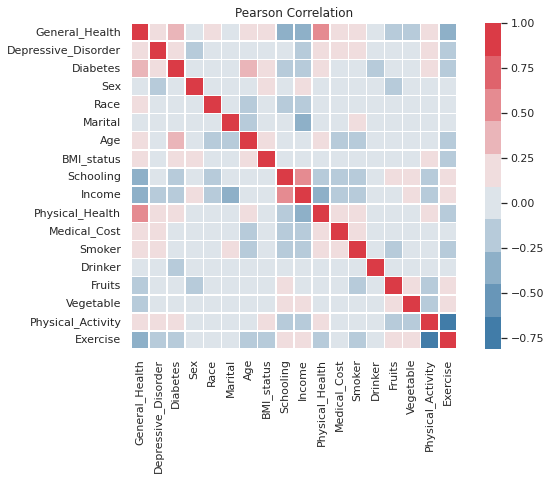

In [49]:
#Use seaborn to create a heapmap for better visualization
#brighter columns show stronger relationship
#Observation:
plt.figure(figsize=(10,6))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=10)
#cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, vmax=1.0, cmap=cmap, linewidths=.5, square=True)
plt.title("Pearson Correlation")
plt.show()

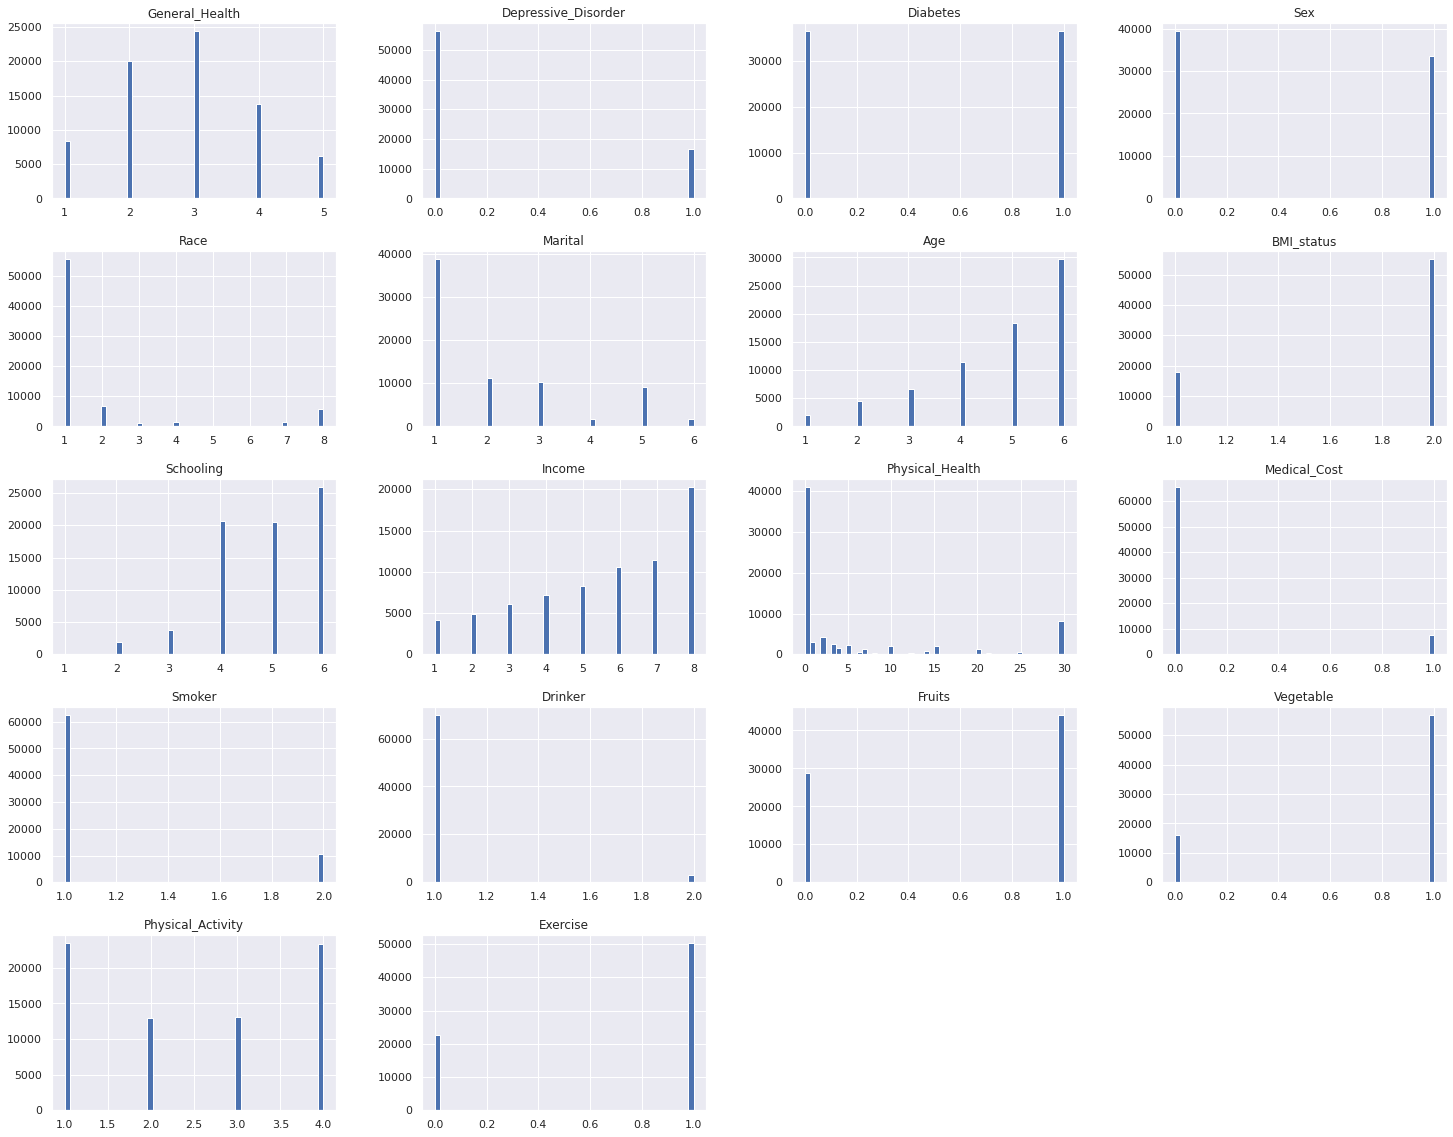

In [50]:
# Let's plot a histogram to see the shape of each individual feature and also the outcome column
#This will confirm our categories 
result.hist(bins=50, figsize=(25, 20))
plt.show()

In [51]:
#describe to give us some statistics
result.describe()

,General_Health,Depressive_Disorder,Diabetes,Sex,Race,Marital,Age,BMI_status,Schooling,Income,Physical_Health,Medical_Cost,Smoker,Drinker,Fruits,Vegetable,Physical_Activity,Exercise
count,72886.000000,72886.000000,72886.000000,72886.000000,72886.000000,72886.000000,72886.000000,72886.000000,72886.000000,72886.000000,72886.000000,72886.000000,72886.000000,72886.000000,72886.000000,72886.000000,72886.000000,72886.000000
mean,2.853854,0.229194,0.500000,0.460719,1.904207,2.128351,4.765689,1.754672,4.885451,5.601323,5.848270,0.102022,1.144143,1.044165,0.603573,0.778490,2.500220,0.689488
std,1.116775,0.420317,0.500003,0.498458,2.085512,1.503467,1.374193,0.430285,1.041043,2.202399,10.080927,0.302680,0.351237,0.205463,0.489158,0.415266,1.239344,0.462707
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,2.000000,4.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,3.000000,0.000000,0.500000,0.000000,1.000000,1.000000,5.000000,2.000000,5.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
75%,4.000000,0.000000,1.000000,1.000000,1.000000,3.000000,6.000000,2.000000,6.000000,8.000000,6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
max,5.000000,1.000000,1.000000,1.000000,8.000000,6.000000,6.000000,2.000000,6.000000,8.000000,30.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000


In [52]:
#Would normally scale values here, but not necessary as the scales are mostly comparable

## Train, Explore and Evaluate Different Models

In [53]:
#Separate dataset into labels and features. Label is the diabetes column
X = np.array(result.drop(['Diabetes'], axis=1))
y = np.array(result['Diabetes'])


In [54]:
#split dataset into training and testing for models
#can add random_state=<some value>. This would ensure we get the same sets each time
#70% for the train and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True, random_state=10)

In [55]:
#next step is to train our model. We need to test a few and see which one we can focus on to use 
#and improve.
#Since it's a classifcation problem, there are a number of models that we can check

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

In [56]:
#We can now store the model objects in an array so we can process them in a loop
models = []
#models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('DTR', DecisionTreeRegressor()))
models.append(('GNB', GaussianNB()))

In [57]:
#The model_selection utility provides us a way how we can score and compare our models
from sklearn import model_selection
#We can need a structure to store our results and our model names. Let's use a dictionary for this
#We also make use of a random_state value to ensure we can repeat our test with the same results
results={}
timers = {}
for name, model in models:
    start = time.time()
    kfold = model_selection.KFold(n_splits=10,random_state=7,shuffle=True)
    score_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    final_time = end - start
    results[name] = str(round(score_results.mean()*100)) + "% (" + str(round(final_time)) + " seconds)" 
    
    
for key, value in results.items():
    print("%s => %s " % (key,value))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RFC => 71% (44 seconds) 
LR => 73% (7 seconds) 
KNN => 68% (40 seconds) 
GNB => 71% (0 seconds) 


## Choose Model and perform hyperparameter tuning

In [58]:
#We can use GridSearchCV to build a grid and see what would be the best combination parameters for support vector since
#it gave use the highest score
# we also need to check the parameters for support vector
# Have to look at documentation to see options for the values
from sklearn.model_selection import GridSearchCV
lr_model = LogisticRegression()
lr_model.get_params().keys()


dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [59]:
#create a dictionary of parameters to tune
tuned_parameters = {
    'multi_class': ['auto','ovr','multinomial'],
    'C': [1, 10, 50, 100],
    'solver':['newton-cg', 'lbfgs', 'sag', 'saga'], 
    }
gridSearch = GridSearchCV(lr_model, tuned_parameters, cv=10, scoring='accuracy')
gridSearch.fit(X_train, y_train)    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 50, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring='accuracy')

In [60]:
#we can then look at the best score from the result
gridSearch.best_score_

0.7307330458643669

In [61]:
#We can also look at the best parameters
gridSearch.best_params_

{'C': 50, 'multi_class': 'auto', 'solver': 'lbfgs'}

In [62]:
#We will now select the best estimator(model with the best parameters) and store the model
lr = gridSearch.best_estimator_

In [63]:
#Training the model on the best estimator
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=50)

In [64]:
#Let us check the accuracy with out test data
accuracy = lr.score(X_test,y_test)
print("The accuracy of the model on the test set is:  %f" % accuracy)

The accuracy of the model on the test set is:  0.737721


In [65]:
#Predictions on the  test set
Y_predict_test = lr.predict(X_test)

Confusion Matrix :
[[7766 3209]
 [2526 8365]]


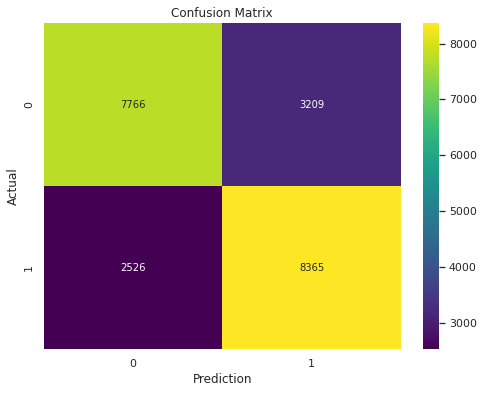

In [66]:
#Let's look on the confusion matrix
from sklearn.metrics import confusion_matrix 

results_predict = confusion_matrix(y_test, Y_predict_test) 
  
print('Confusion Matrix :')
print(results_predict)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(results_predict, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

#predicted NO and NO in top left (TN)
#Predicted No and actually YES in bottom left (FN)
#Predicted YES and actually NO top right (FP)
#Pedicted YES and actually YES bottom right (TP)

In [67]:
#values = (zip(Y_predict_test,y_test))
#for x in values:
#    print(x)

In [68]:
#Saving model to disk
import pickle
pickle.dump(lr, open('my_lr_model.sav','wb'))

## Make Prediction

In [69]:
#[GENHLTH 	ADDEPEV2 	DIABETE3 	SEX 	_RACE 	MARITAL 	_AGE_G 	_RFBMI5 	EDUCA 	INCOME2 	PHYSHLTH 	MEDCOST 	_RFSMOK3 	_RFDRHV5 	_FRTLT1 	_VEGLT1 	_PACAT1 	_TOTINDA]
#['General_Health','Depressive_Disorder','Diabetes','Sex', 'Race','Marital','Age','BMI_status','Schooling','Income','Physical_Health','Medical_Cost','Smoker','Drinker','Fruits','Vegetable','Physical_Activity','Exercise']

#- General_Health (1:Excellent, 2: Very Good, 3: Good, 4: Fair, 5: Poor) [Would you say that in general your health is:]
#- Depressive_Disorder (1: Yes, 2: No) [Ever told) you that you have a depressive disorder, including depression, major depression, dysthymia, or minor depression?]
#	Diabetes (0:No, 1: Yes)
#-	Sex (1: Male, 0: Female)
#-	Race (1: White-Non-His, 2: Black-non-His, 3: American Indian, 4: Asian-non-His, 5: Native Hawaiian, 6: Other race only-nonHis, 7: Multiracial-nonHis, 8:Hispanic, 9: not sure)
#- Marital (1: Married, 2: Divorced, 3: Widowed, 4: Separated, 5: Never Married, 6: Member of an unmarried couple)
#-	Age (1:18-24, 2:25-34, 3:35-44, 4: 45-54, 5: 55-64, 6: 65 or older)
#- BMI_status (1: No, 2:Yes)  [Adults who have a body mass index greater than 25.00 (Overweight or Obese)]
#-	Schooling (1: Never attended or kindergarted, 2: Elementary, 3: Some High School, 4: High School Graduate, 5: High School Graduate, 6: College Graduate)  [What is the highest grade or year of school you completed?]
#- Income  (1: Less that 10k, 2: 10K to less 15k, 3: 15k to less thatn 20k, 4: 20k to less than 25k, 5: 25k to less than 35k, 6: 35k to less than 50 k, 7: 50k to less than 75k, 8: 75k or more  ) [Annual household income from all sources:]
#-	Physical_Health (1-30 number of days, 88 none) [Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?]
#-	Medical_Cost (1: yes, 2: No) [Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?]
#-	Smoker  (1: No, 2: Yes) [Adults who are current smokers]
#- Drinker (1: No, 2: Yes) [Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)]
#-	Fruits (1: yes, 2:no) [Consume Fruit 1 or more times per day]
#-	Vegetable (1:yes, 2: no) [Consume Vegetables 1 or more times per day]
#-	Physical_Activity (1: Highly Active, 2:Active, 3:Insufficiently Active, 4: Inactive) [Physical Activity Categories]
#- Exercise (1: Had physical activity, 2: no physical activity)[Adults who reported doing]

#Predict = [1,1,1,2,2,4,2,5,4,22,1,2,2,2,2,3,2]

In [70]:
#Loading the model from disk
loaded_lr_model = pickle.load(open('my_lr_model.sav','rb'))

In [71]:
#create dataframe for testprediction
y_predict_df = pd.DataFrame([[1,1,1,2,2,4,2,5,4,22,1,2,2,2,2,3,2]])

In [72]:
new_predict = lr.predict(y_predict_df)

In [73]:
new_predict

array([0.])

**Testing ANN using PyTorch**

In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [75]:
#creating tensors
X_train_t = torch.FloatTensor(X_train)
X_test_t = torch.FloatTensor(X_test)
y_train_t = torch.LongTensor(y_train)
y_test_t = torch.LongTensor(y_test)

In [76]:
X_train_t

tensor([[3., 0., 1.,  ..., 1., 1., 1.],
        [5., 0., 0.,  ..., 1., 4., 0.],
        [2., 0., 0.,  ..., 1., 1., 1.],
        ...,
        [3., 0., 1.,  ..., 1., 2., 1.],
        [4., 1., 1.,  ..., 1., 4., 0.],
        [2., 0., 0.,  ..., 1., 3., 1.]])

In [77]:
# creating model with PyTorch. DEfine the class
class ANN_Model(nn.Module):
    def __init__(self, input_features=17, hidden1=30, hidden2=30, out_features=2):
        super().__init__()
        self.f_connected1 =  nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [78]:
# instantiate my model
torch.manual_seed(20)
model = ANN_Model()

In [79]:
#check the model parameters
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=17, out_features=30, bias=True)
  (f_connected2): Linear(in_features=30, out_features=30, bias=True)
  (out): Linear(in_features=30, out_features=2, bias=True)
)>

In [80]:
## Backward propogation -- Define the loss_function and define the optimizer
#model.parameters() will return a generator that's why we used the brackets
loss_function = nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)


In [81]:
#trigger the propogation
epochs=1000
final_losses=[]
for i in range(epochs):
    i = i+1
    y_pred = model.forward(X_train_t)
    loss=loss_function(y_pred, y_train_t)
    final_losses.append(loss.item())
    if i%10==1:
        print("Epoch number: {} and the loss: {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss: 0.9019689559936523
Epoch number: 11 and the loss: 0.6318963170051575
Epoch number: 21 and the loss: 0.5882260203361511
Epoch number: 31 and the loss: 0.5666530132293701
Epoch number: 41 and the loss: 0.5539806485176086
Epoch number: 51 and the loss: 0.5453917384147644
Epoch number: 61 and the loss: 0.539898693561554
Epoch number: 71 and the loss: 0.5361142754554749
Epoch number: 81 and the loss: 0.5338411927223206
Epoch number: 91 and the loss: 0.5327318906784058
Epoch number: 101 and the loss: 0.5317730903625488
Epoch number: 111 and the loss: 0.5305513739585876
Epoch number: 121 and the loss: 0.5299867987632751
Epoch number: 131 and the loss: 0.529275119304657
Epoch number: 141 and the loss: 0.5291013121604919
Epoch number: 151 and the loss: 0.5289059281349182
Epoch number: 161 and the loss: 0.528166651725769
Epoch number: 171 and the loss: 0.5274162292480469
Epoch number: 181 and the loss: 0.5272048115730286
Epoch number: 191 and the loss: 0.52847790718

Text(0.5, 0, 'Epoch')

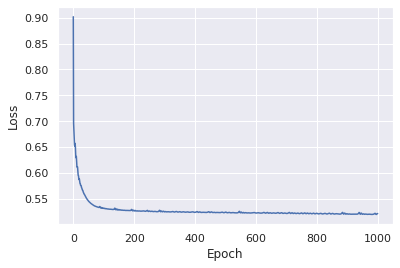

In [82]:
#plot the loss function
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [85]:
#create prediction with with X_test_t
#Don't need gradient for this
test_predictions = []
with torch.no_grad():
  for i, value in enumerate(X_test_t):
    y_pred = model(value)
    test_predictions.append(y_pred.argmax().item()) 


In [88]:
test_predictions[:5]

[0, 0, 1, 0, 1]

In [89]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test_t,test_predictions)
m

array([[7168, 3807],
       [1835, 9056]])

In [90]:
#check accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test_t, test_predictions)
score

0.7419738406658739